#### Import packages

In [1]:
from scipy.stats import gamma
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
x = np.linspace (0,1,100)
y=gamma.rvs(size=10000,a=((mean_val)**2/var_val, scale=1/(mean_val)/var_val)

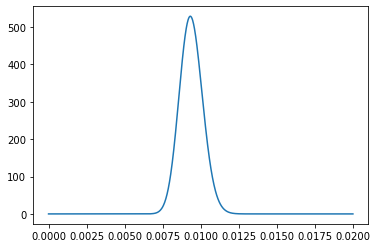

In [89]:
from scipy import stats as stats
data_pdf=stats.gamma(a=((mean_val)**2/var_val), scale=1/((mean_val)/var_val))
x=np.linspace(0,0.02,1000)
plt.plot(x,data_pdf.pdf(x))
#plt.fill_betweenx(hdi,data_pdf.pdf(hdi))

In [102]:
data_pdf.pdf(hdi[0])

102.35677640220568

In [2]:
# Style arguments for the plot
bbox = {'fc':   '0.8', 'pad': 0.9}
props={'ha': 'center', 'va': 'center', 'bbox': bbox}

Since the distributions are generated in Julia,the alpha and beta values for the prior and posterior distributions needs to be passed as values in Python. Additionally the point estimate also needs to be passed.

In [3]:
# Prior distribution's alpha and beta values

prior_alpha_p1=4.6967
prior_alpha_p2=1.3319
prior_alpha_p3=1.122605
prior_alpha_p4=0.5622

prior_beta_p1=446.36843
prior_beta_p2=581.8869
prior_beta_p3=1.3647
prior_beta_p4=0.1407

In [4]:
#Posterior distribution's alpha and beta values

post_alpha_p1=35.9527
post_alpha_p2=24.25322
post_alpha_p3=17.3026
post_alpha_p4=0.0011

post_beta_p1=4179.904
post_beta_p2=11671.862
post_beta_p3=14.39204
post_beta_p4=1.5833



In [5]:
# Point estimates

estimate_p1=0.008
estimate_p2=0.002
estimate_p3=1.2022
estimate_p4=1.4522

Function to calculate High Density Interval (HDI)

In [6]:
from scipy.optimize import fmin
from scipy.stats import *

# Input: Name of distribution uses, Credible Interval Mass, additional arguments for the distribution

def HDIofICDF(dist_name, credMass=0.90, **args):
    # freeze distribution with given arguments
    distri = dist_name(**args)
    # initial guess for HDIlowTailPr
    incredMass =  1.0 - credMass

    def intervalWidth(lowTailPr):
        return distri.ppf(credMass + lowTailPr) - distri.ppf(lowTailPr)

    # find lowTailPr that minimizes intervalWidth
    HDIlowTailPr = fmin(intervalWidth, incredMass, ftol=1e-8, disp=False)[0]
    # return interval as array([low, high])
    return distri.ppf([HDIlowTailPr, credMass + HDIlowTailPr])



In [7]:
hdi= HDIofICDF(gamma,a=post_alpha_p1,scale=1/(post_beta_p1),credMass=0.60)

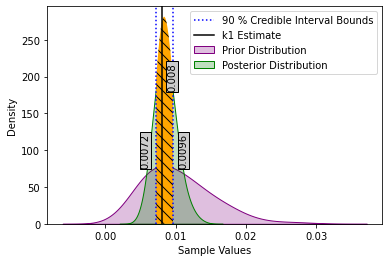

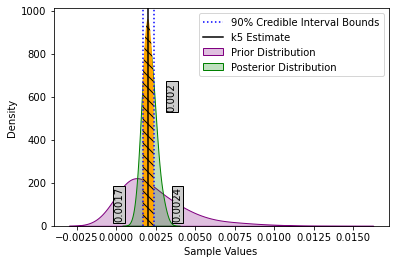

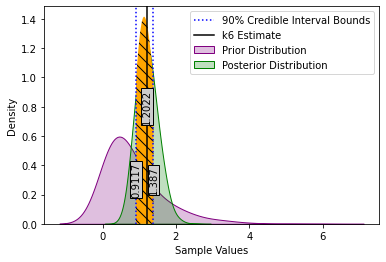

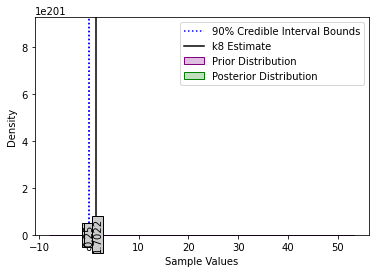

"\nfig.savefig('plot.jpg', bbox_inches='tight')\n "

In [11]:
from scipy import stats as stats
prior_pdf=stats.gamma(a=prior_alpha_p1, scale=1/(prior_beta_p1))
data_pdf=stats.gamma(a=post_alpha_p1, scale=1/(post_beta_p1))
data_post = data_pdf.rvs(1000)
data_prior= prior_pdf.rvs(1000)
#fig.add_subplot(2,2,1)

sns.kdeplot(data_prior, bw_method=0.5, fill=True,color="purple", label="Prior Distribution")
sns.kdeplot(data_post, bw_method=0.5, fill=True,color="green", label="Posterior Distribution")
plt.xlabel("Sample Values")
hdi= HDIofICDF(gamma,a=post_alpha_p1,scale=1/(post_beta_p1),credMass=0.60)
x= np.linspace(hdi[0],hdi[1],1000)
plt.fill_between(x,data_pdf.pdf(x),facecolor="orange",hatch="\\\\" )
plt.axvline(hdi[0],color="blue",linestyle='dotted',label="90 % Credible Interval Bounds")
plt.axvline(hdi[1],color="blue",linestyle="dotted")
plt.text(hdi[0]-0.0015,100,str(round(hdi[0],4)),props,rotation=90)
plt.text(hdi[1]+0.0015,100,str(round(hdi[1],4)),props,rotation=90)
plt.text(estimate_p1+0.0015,200,str(round(estimate_p1,4)),props,rotation=90)
plt.axvline(estimate_p1,color="black",linewidth=1.5, label="k1 Estimate")
plt.legend()
plt.show()


#plot2
prior_pdf=stats.gamma(a=prior_alpha_p2, scale=1/(prior_beta_p2))
data_pdf=stats.gamma(a=post_alpha_p2, scale=1/(post_beta_p2))
data_post = data_pdf.rvs(1000)
data_prior= prior_pdf.rvs(1000)


sns.kdeplot(data_prior, bw_method=0.5, fill=True,color="purple", label="Prior Distribution")
sns.kdeplot(data_post, bw_method=0.5, fill=True,color="green", label="Posterior Distribution")
plt.xlabel("Sample Values")
hdi= HDIofICDF(gamma,a=post_alpha_p2,scale=1/(post_beta_p2),credMass=0.60)
x= np.linspace(hdi[0],hdi[1],1000)
plt.fill_between(x,data_pdf.pdf(x),facecolor="orange",hatch="\\\\" )
plt.axvline(hdi[0],color="blue",linestyle='dotted',label="90% Credible Interval Bounds")
plt.axvline(hdi[1],color="blue",linestyle="dotted")
plt.text(hdi[0]-0.0015,100,str(round(hdi[0],4)),props,rotation=90)
plt.text(hdi[1]+0.0015,100,str(round(hdi[1],4)),props,rotation=90)
plt.text(estimate_p2+0.0015,600,str(round(estimate_p2,4)),props,rotation=90)
plt.axvline(estimate_p2,color="black",linewidth=1.5, label="k5 Estimate")
plt.legend()
plt.show()
#plot3

prior_pdf=stats.gamma(a=prior_alpha_p3, scale=1/(prior_beta_p3))
data_pdf=stats.gamma(a=post_alpha_p3, scale=1/(post_beta_p3))
data_post = data_pdf.rvs(1000)
data_prior= prior_pdf.rvs(1000)


sns.kdeplot(data_prior, bw_method=0.5, fill=True,color="purple", label="Prior Distribution")
sns.kdeplot(data_post, bw_method=0.5, fill=True,color="green", label="Posterior Distribution")
plt.xlabel("Sample Values")
hdi= HDIofICDF(gamma,a=post_alpha_p3,scale=1/(post_beta_p3),credMass=0.60)
x= np.linspace(hdi[0],hdi[1],1000)
plt.fill_between(x,data_pdf.pdf(x),facecolor="orange",hatch="\\\\" )
plt.axvline(hdi[0],color="blue",linestyle='dotted',label="90% Credible Interval Bounds")
plt.axvline(hdi[1],color="blue",linestyle="dotted")
plt.text(hdi[0]-0.0015,0.3,str(round(hdi[0],4)),props,rotation=90)
plt.text(hdi[1]+0.0015,0.3,str(round(hdi[1],4)),props,rotation=90)
plt.text(estimate_p3+0.0015,0.8,str(round(estimate_p3,4)),props,rotation=90)
plt.axvline(estimate_p3,color="black",linewidth=1.5, label="k6 Estimate")
plt.legend()
plt.show()


prior_pdf=stats.gamma(a=prior_alpha_p4, scale=1/(prior_beta_p4))
data_pdf=stats.gamma(a=post_alpha_p4, scale=1/(post_beta_p4))
data_post = data_pdf.rvs(1000)
data_prior= prior_pdf.rvs(1000)


sns.kdeplot(data_prior, bw_method=0.5, fill=True,color="purple", label="Prior Distribution")
sns.kdeplot(data_post, bw_method=0.5, fill=True,color="green", label="Posterior Distribution")
plt.xlabel("Sample Values")
hdi= HDIofICDF(gamma,a=post_alpha_p4,scale=1/(post_beta_p4),credMass=0.60)
x= np.linspace(hdi[0],hdi[1],1000)
plt.fill_between(x,data_pdf.pdf(x),facecolor="orange",hatch="\\\\" )
plt.axvline(hdi[0],color="blue",linestyle='dotted',label="90% Credible Interval Bounds")
plt.axvline(hdi[1],color="blue",linestyle="dotted")
plt.text(hdi[0]-0.15,0.3,str(round(hdi[0]+0.25,4)),props,rotation=90)
plt.text(hdi[1]+0.15,0.3,str(round(hdi[1]+0.25,4)),props,rotation=90)
plt.text(estimate_p4+0.0015+0.25,0.8,str(round(estimate_p4+0.25,4)),props,rotation=90)
plt.axvline(estimate_p4,color="black",linewidth=1.5, label="k8 Estimate")
plt.legend()
plt.show() 
